In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from scipy.stats import norm
import math
from scipy import stats

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_excel('life_satisfaction.xlsx')
df

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government
0,Afghanistan,2008,3.723590,7.197130,0.450662,47.550438,0.718114,0.183062,0.881686,0.517637,0.258195,0.612072
1,Afghanistan,2009,4.401778,7.362664,0.552308,47.859673,0.678896,0.204633,0.850035,0.583926,0.237092,0.611545
2,Afghanistan,2010,4.758381,7.416260,0.539075,48.159512,0.600127,0.138529,0.706766,0.618265,0.275324,0.299357
3,Afghanistan,2011,3.831719,7.445761,0.521104,48.451160,0.495901,0.176108,0.731109,0.611387,0.267175,0.307386
4,Afghanistan,2012,3.782938,7.549241,0.520637,48.738346,0.530935,0.247713,0.775620,0.710385,0.267919,0.435440
...,...,...,...,...,...,...,...,...,...,...,...,...
1415,Zimbabwe,2012,4.955101,7.407775,0.896476,45.319149,0.469531,-0.059864,0.858691,0.669279,0.177311,0.407084
1416,Zimbabwe,2013,4.690188,7.429061,0.799274,47.000294,0.575884,-0.062995,0.830937,0.711885,0.182288,0.527755
1417,Zimbabwe,2014,4.184451,7.443748,0.765839,48.576164,0.642034,-0.033504,0.820217,0.725214,0.239111,0.566209
1418,Zimbabwe,2015,3.703191,7.431285,0.735800,50.152035,0.667193,-0.081744,0.810457,0.715079,0.178861,0.590012


In [3]:
df = df.dropna()

In [4]:
df

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government
0,Afghanistan,2008,3.723590,7.197130,0.450662,47.550438,0.718114,0.183062,0.881686,0.517637,0.258195,0.612072
1,Afghanistan,2009,4.401778,7.362664,0.552308,47.859673,0.678896,0.204633,0.850035,0.583926,0.237092,0.611545
2,Afghanistan,2010,4.758381,7.416260,0.539075,48.159512,0.600127,0.138529,0.706766,0.618265,0.275324,0.299357
3,Afghanistan,2011,3.831719,7.445761,0.521104,48.451160,0.495901,0.176108,0.731109,0.611387,0.267175,0.307386
4,Afghanistan,2012,3.782938,7.549241,0.520637,48.738346,0.530935,0.247713,0.775620,0.710385,0.267919,0.435440
...,...,...,...,...,...,...,...,...,...,...,...,...
1415,Zimbabwe,2012,4.955101,7.407775,0.896476,45.319149,0.469531,-0.059864,0.858691,0.669279,0.177311,0.407084
1416,Zimbabwe,2013,4.690188,7.429061,0.799274,47.000294,0.575884,-0.062995,0.830937,0.711885,0.182288,0.527755
1417,Zimbabwe,2014,4.184451,7.443748,0.765839,48.576164,0.642034,-0.033504,0.820217,0.725214,0.239111,0.566209
1418,Zimbabwe,2015,3.703191,7.431285,0.735800,50.152035,0.667193,-0.081744,0.810457,0.715079,0.178861,0.590012


In [5]:
df.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government
count,1141.000000,1141.000000,1141.000000,1141.000000,1141.000000,1141.000000,1141.000000,1141.000000,1141.000000,1141.000000,1141.000000
mean,2011.426819,5.432275,9.173521,0.812837,61.783686,0.719738,0.001712,0.765831,0.711741,0.258086,0.462750
std,3.080092,1.148184,1.180370,0.118819,8.631518,0.143842,0.158773,0.182002,0.108034,0.075536,0.179330
min,2005.000000,2.701591,6.354652,0.291334,36.167667,0.286814,-0.324367,0.035198,0.362498,0.094316,0.078787
25%,2009.000000,4.571419,8.275130,0.752607,55.597580,0.624296,-0.109193,0.715358,0.621293,0.204996,0.324227
50%,2012.000000,5.310539,9.364961,0.836042,63.690304,0.733384,-0.016127,0.816770,0.725109,0.247829,0.452460
75%,2014.000000,6.269287,10.138541,0.905528,68.680000,0.834174,0.096162,0.889677,0.805346,0.302858,0.591795
max,2016.000000,7.970892,11.459249,0.987343,76.408699,0.969788,0.542249,0.983276,0.943621,0.581267,0.979501


In [6]:
len(df['country'].unique())

139

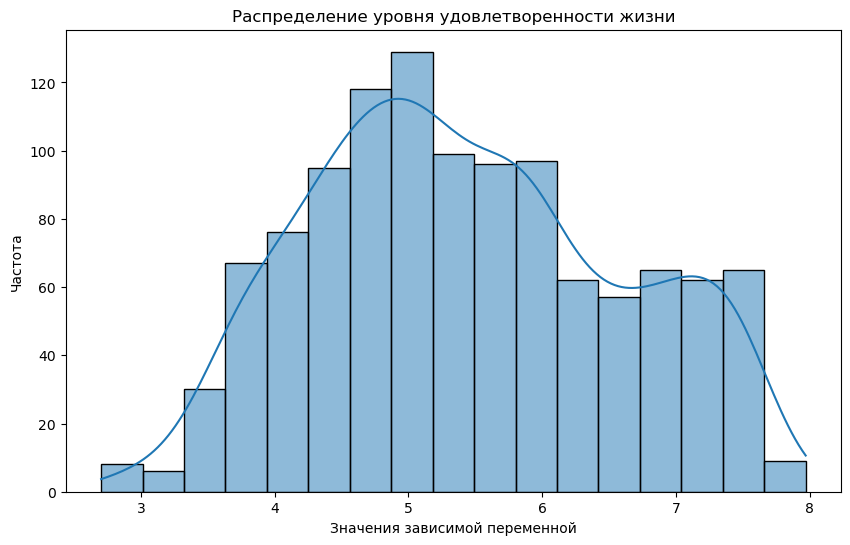

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Life Ladder'], kde=True)
plt.title('Распределение уровня удовлетворенности жизни')
plt.xlabel('Значения зависимой переменной')
plt.ylabel('Частота')
plt.show()

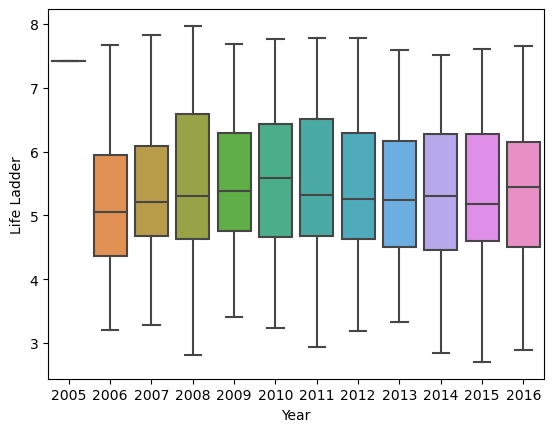

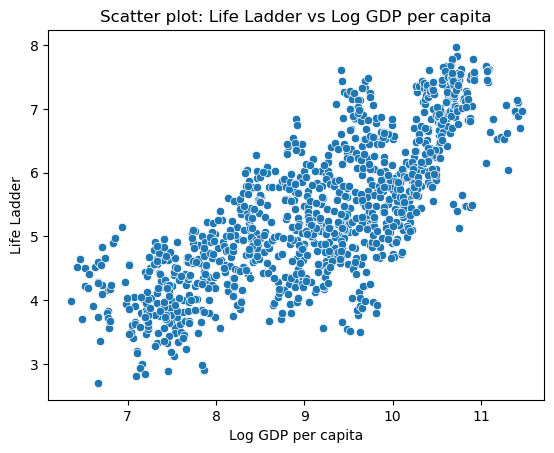

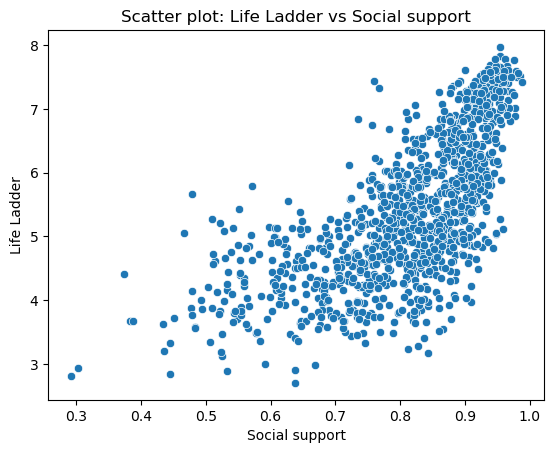

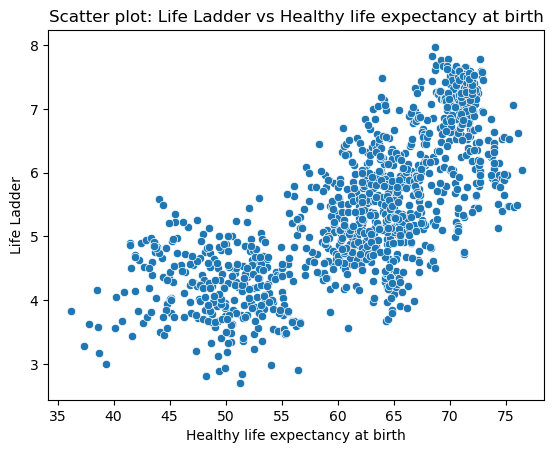

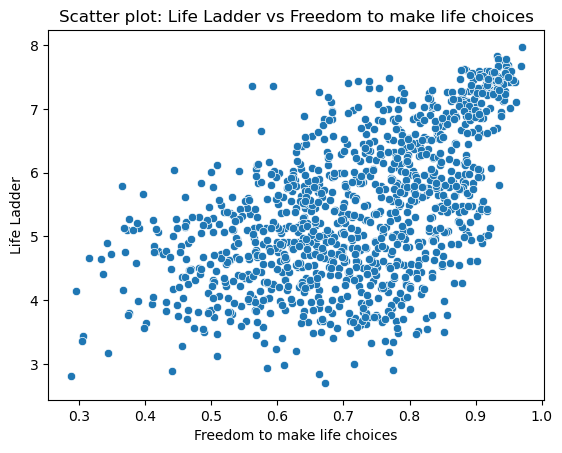

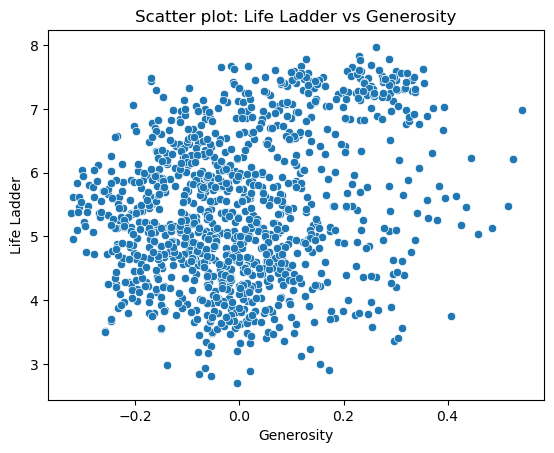

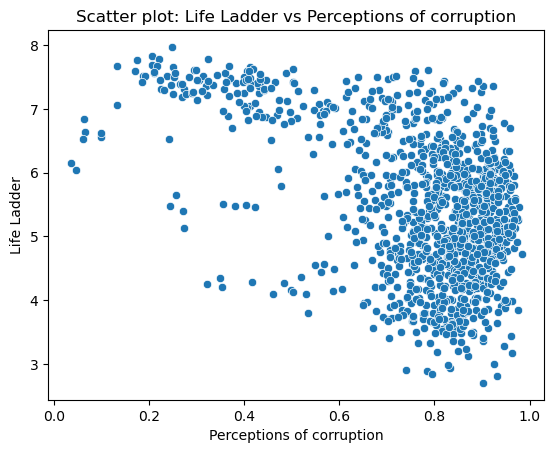

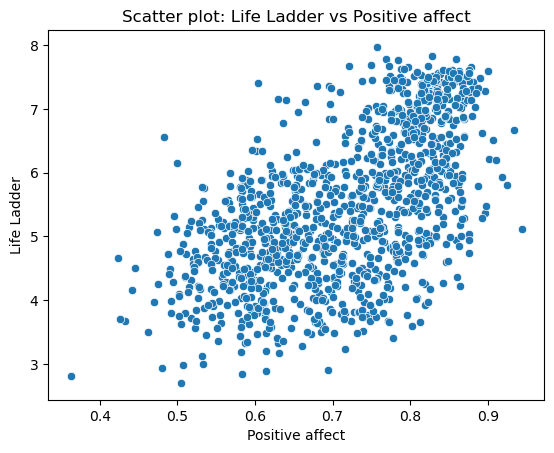

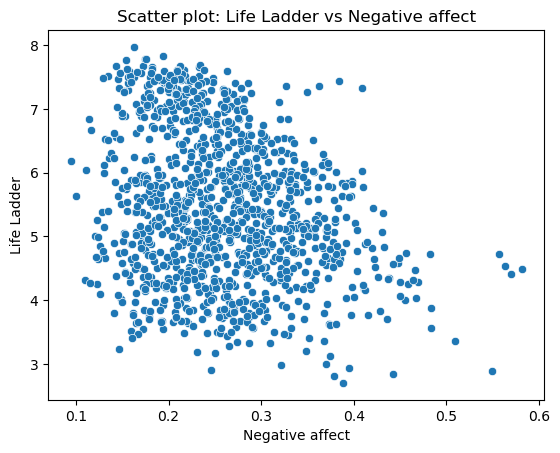

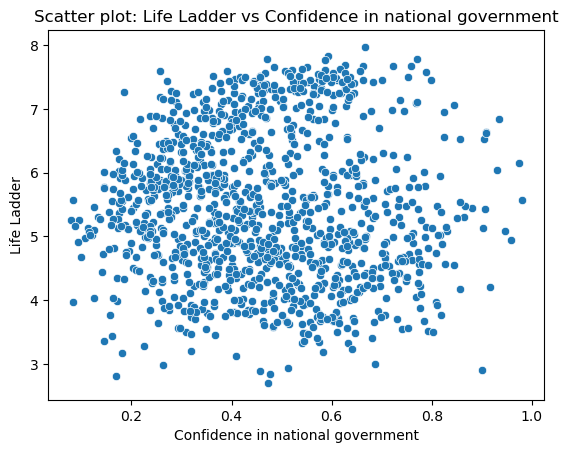

/var/folders/yd/gly865xn5mn6xgmmr3j4bflr0000gn/T/ipykernel_36750/1931562191.py:19: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


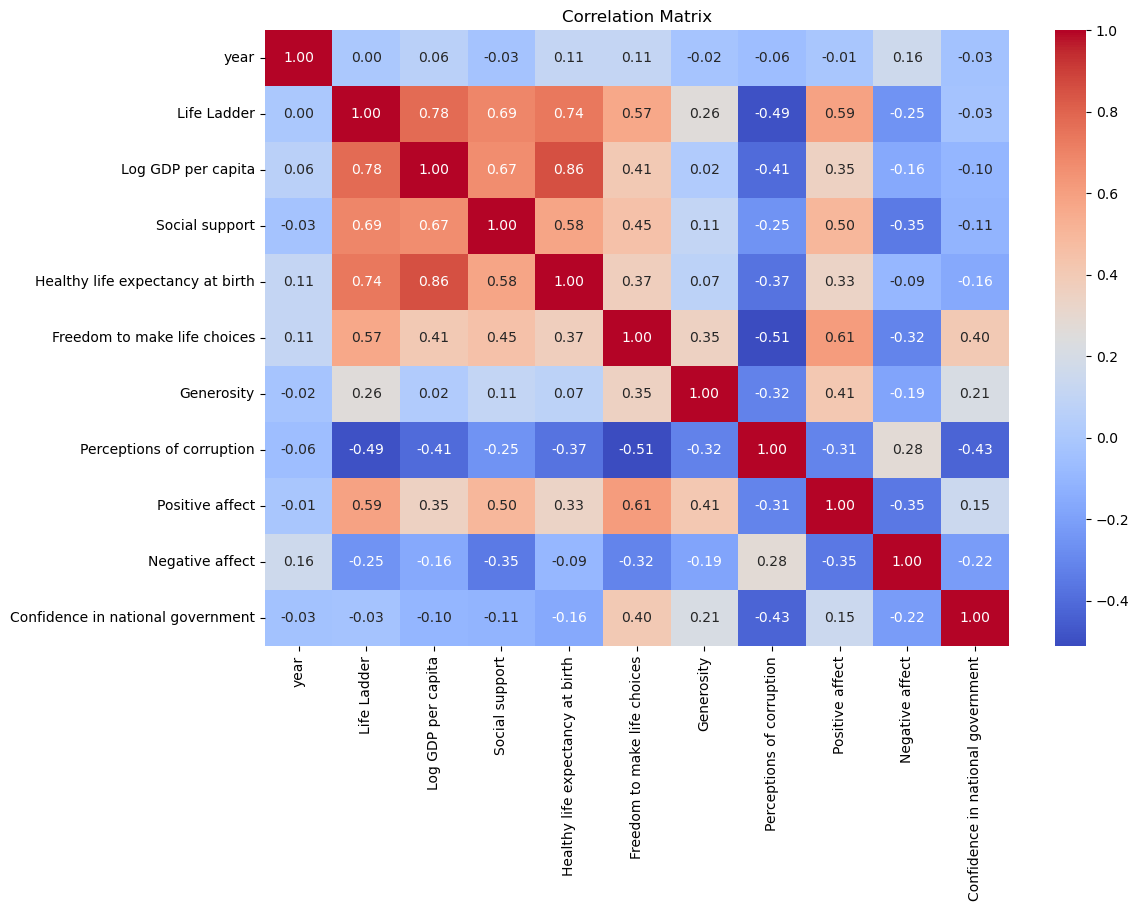

In [8]:
independent_variables = ['year', 'Log GDP per capita', 'Social support', 
                         'Healthy life expectancy at birth', 'Freedom to make life choices',
                         'Generosity', 'Perceptions of corruption', 'Positive affect',
                         'Negative affect', 'Confidence in national government']


sns.boxplot(x='year', y='Life Ladder', data=df).set(
 xlabel='Year', 
 ylabel='Life Ladder')
plt.show()

for var in independent_variables[1:]:
    sns.scatterplot(x=var, y='Life Ladder', data=df)
    plt.title(f'Scatter plot: Life Ladder vs {var}')
    plt.xlabel(var)
    plt.ylabel('Life Ladder')
    plt.show()

correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


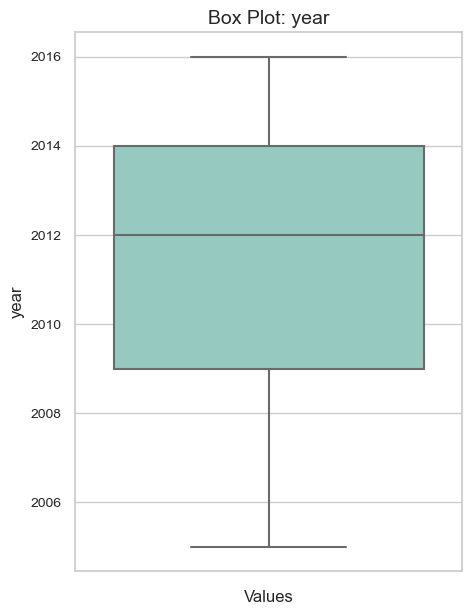

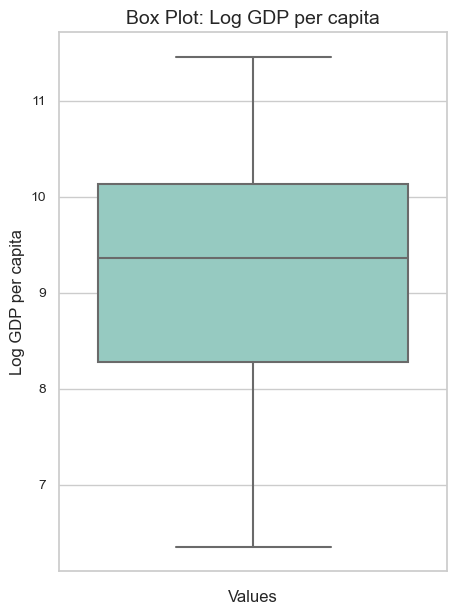

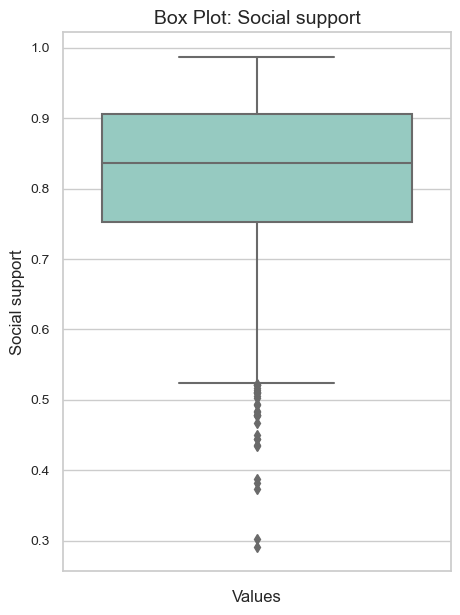

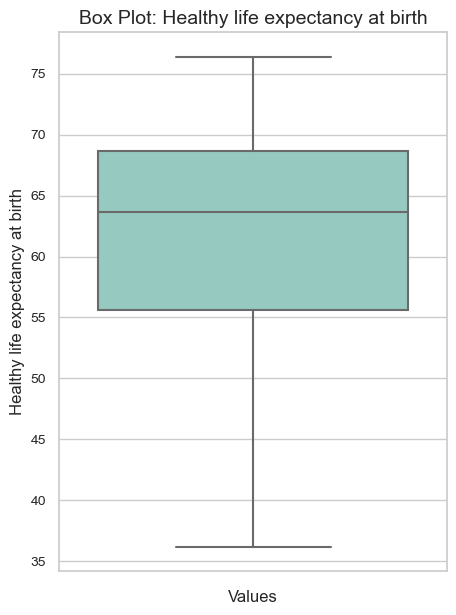

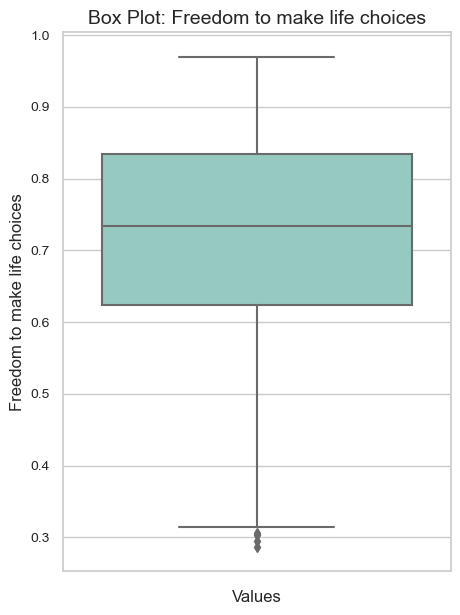

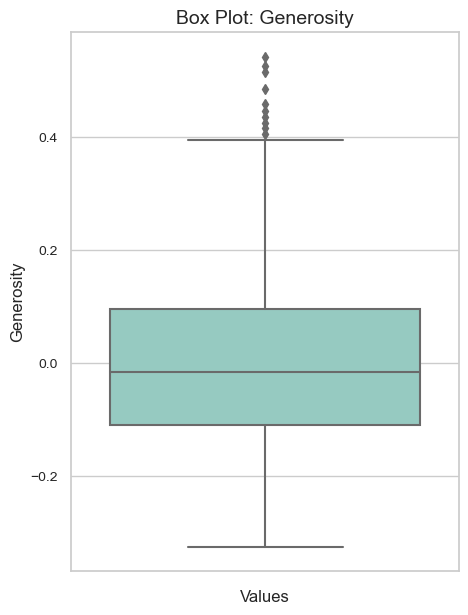

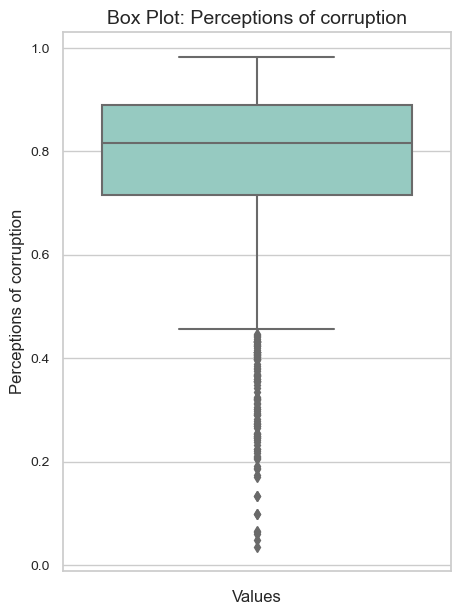

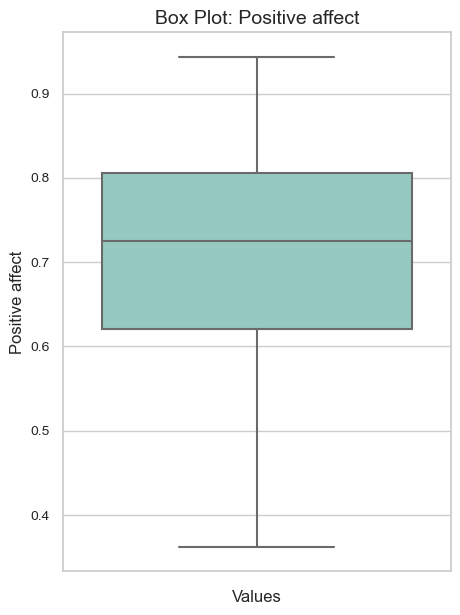

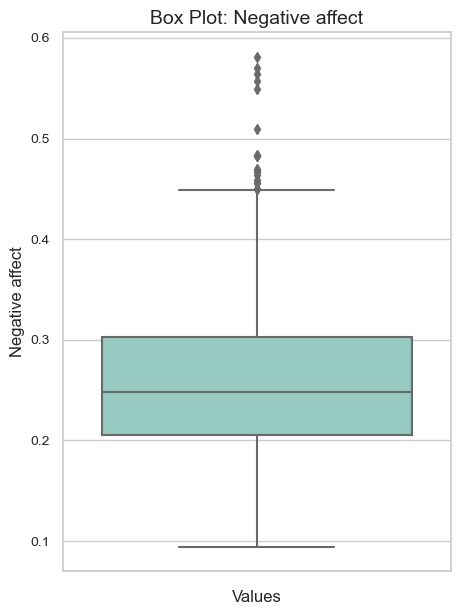

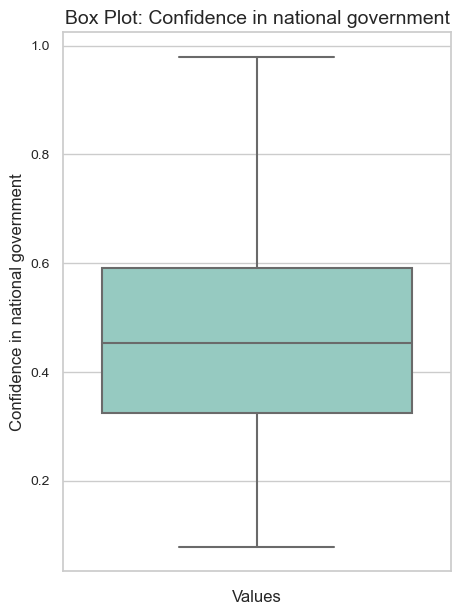

In [9]:
sns.set(style="whitegrid")  
palette = "Set3"  
for var in independent_variables:
    plt.figure(figsize=(5, 7))  
    ax = sns.boxplot(y=var, data=df, palette=palette)
    ax.set_title(f'Box Plot: {var}', fontsize=14) 
    ax.set_ylabel(var, fontsize=12)  
    ax.set_xlabel("Values", fontsize=12) 
    plt.xticks(fontsize=10)  
    plt.yticks(fontsize=10) 
    plt.show()

In [10]:
df = df[df['year']>=2014]
df

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government
6,Afghanistan,2014,3.130896,7.519704,0.525568,49.305813,0.508514,0.118934,0.871242,0.531691,0.374861,0.409048
7,Afghanistan,2015,3.982855,7.506759,0.528597,49.588539,0.388928,0.094635,0.880638,0.553553,0.339276,0.260557
8,Afghanistan,2016,4.220169,7.497288,0.559072,49.871265,0.522566,0.057393,0.793246,0.564953,0.348332,0.324990
15,Albania,2014,4.813763,9.222470,0.625587,68.364594,0.734648,-0.025123,0.882704,0.684911,0.334543,0.498786
16,Albania,2015,4.606651,9.249300,0.639356,68.531487,0.703851,-0.081631,0.884793,0.688370,0.350427,0.506978
...,...,...,...,...,...,...,...,...,...,...,...,...
1407,Zambia,2015,4.843164,8.195832,0.691483,52.254360,0.758654,-0.046648,0.871020,0.690034,0.381731,0.631103
1408,Zambia,2016,4.347544,8.198633,0.767047,52.889324,0.811575,0.114802,0.770644,0.730680,0.372241,0.696892
1417,Zimbabwe,2014,4.184451,7.443748,0.765839,48.576164,0.642034,-0.033504,0.820217,0.725214,0.239111,0.566209
1418,Zimbabwe,2015,3.703191,7.431285,0.735800,50.152035,0.667193,-0.081744,0.810457,0.715079,0.178861,0.590012


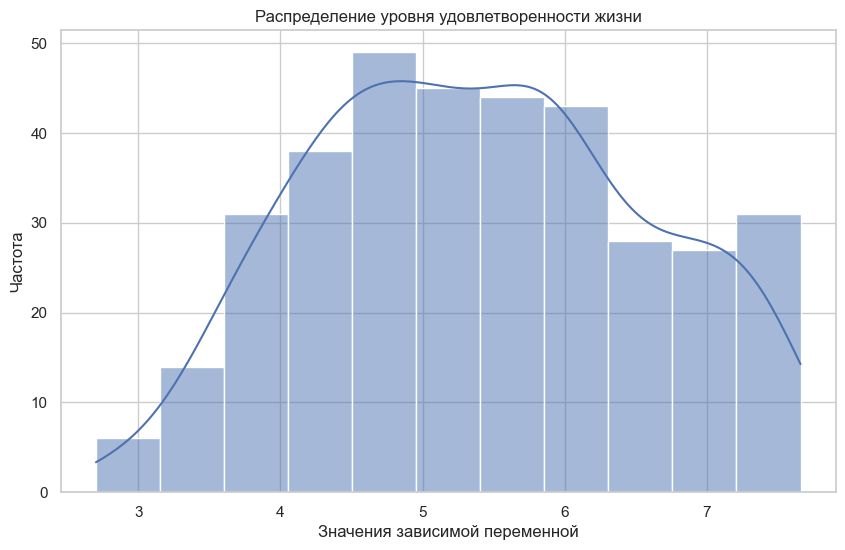

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Life Ladder'], kde=True)
plt.title('Распределение уровня удовлетворенности жизни')
plt.xlabel('Значения зависимой переменной')
plt.ylabel('Частота')
plt.show()

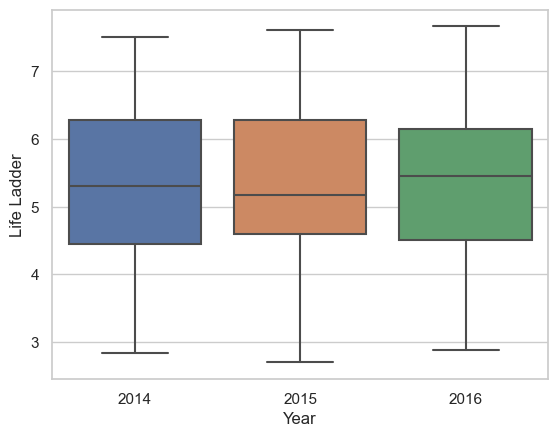

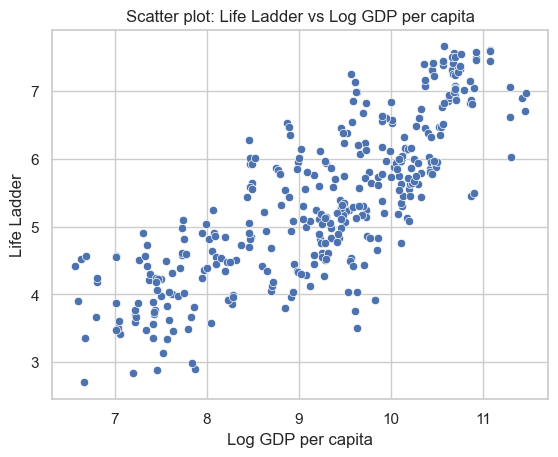

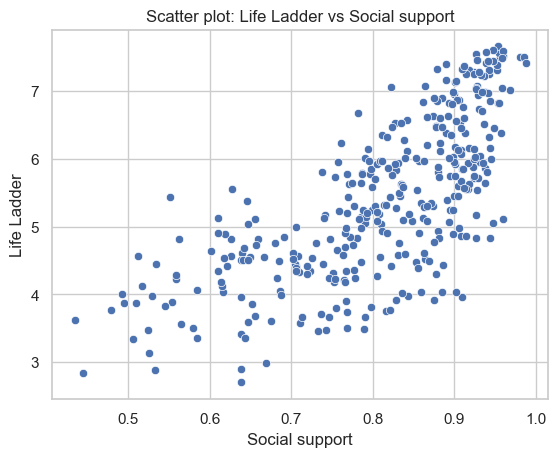

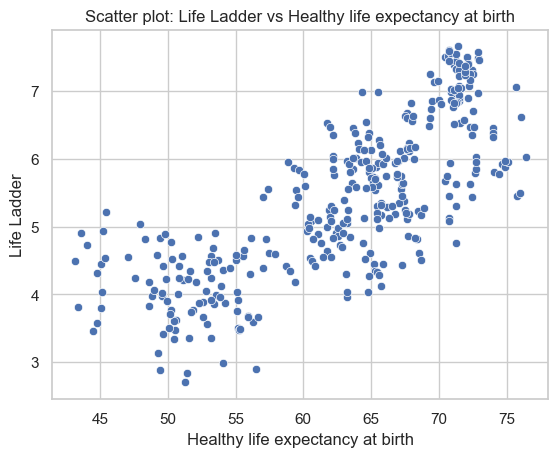

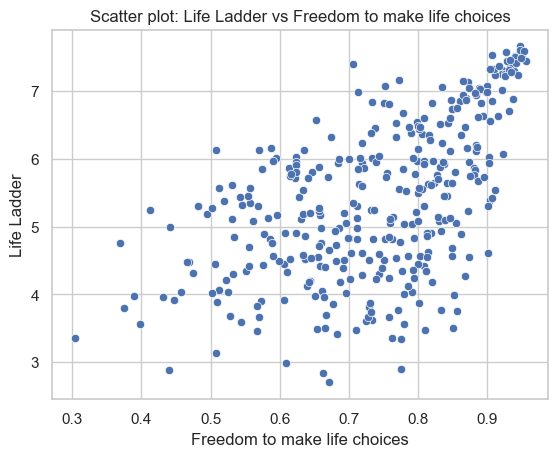

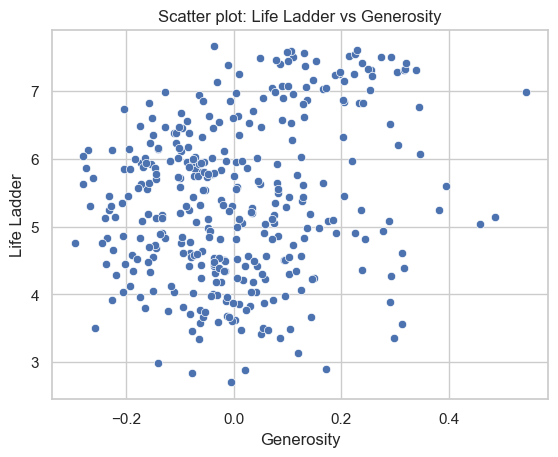

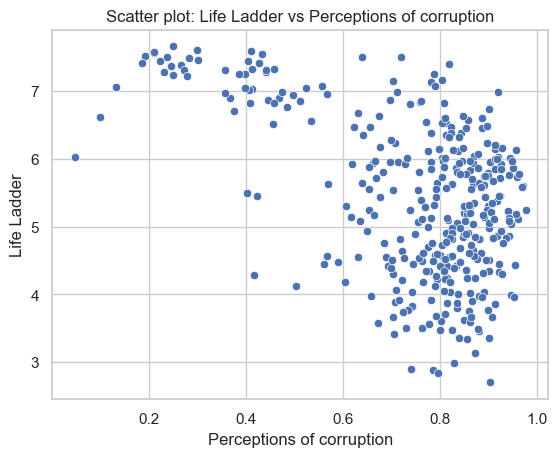

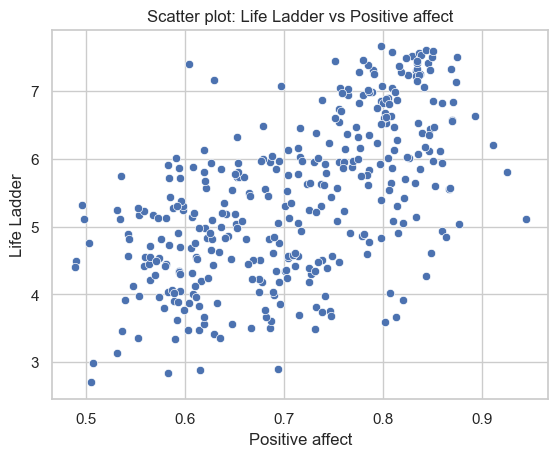

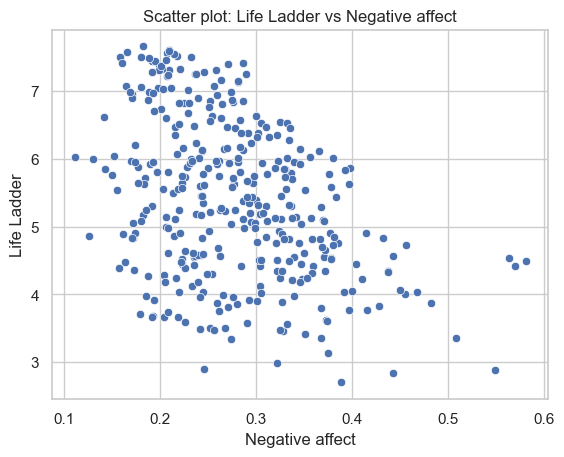

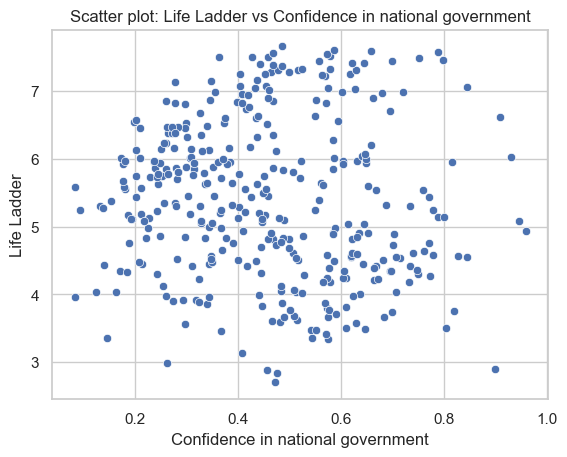

/var/folders/yd/gly865xn5mn6xgmmr3j4bflr0000gn/T/ipykernel_36750/1931562191.py:19: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


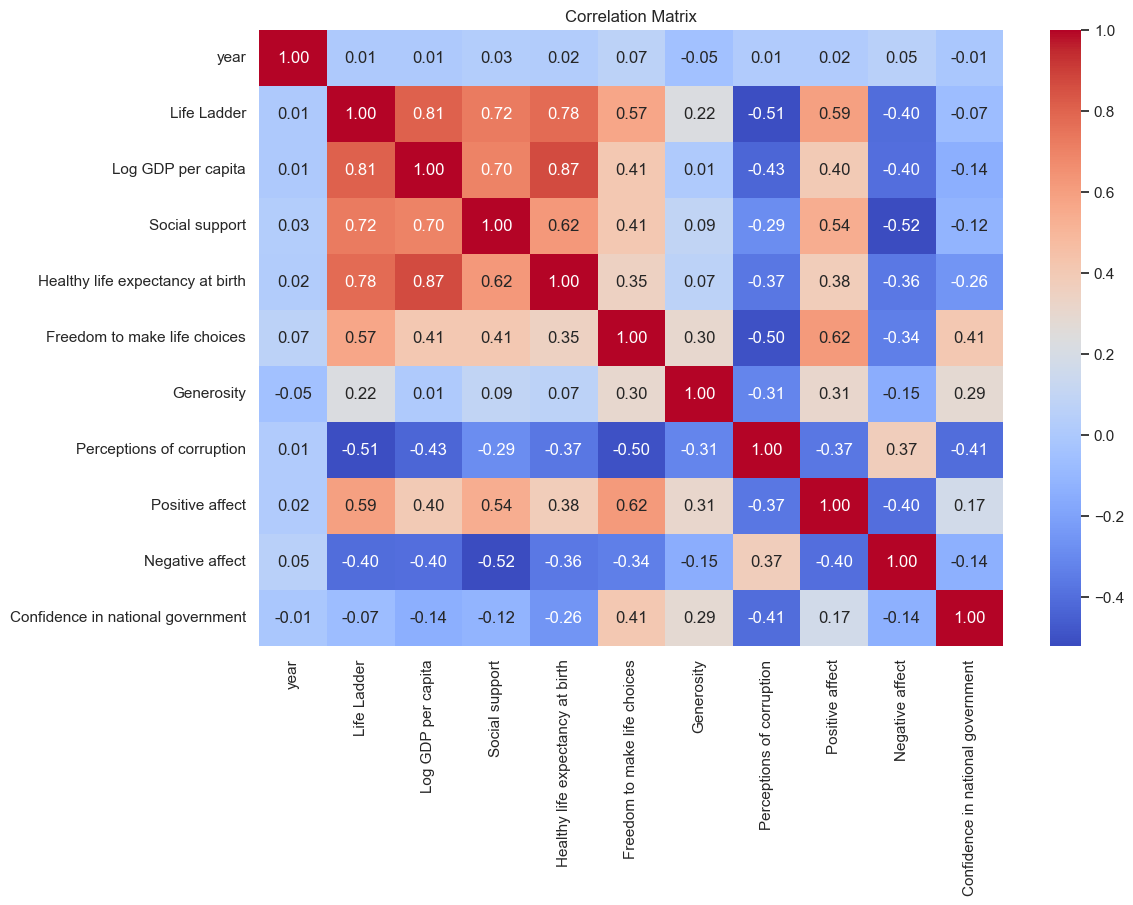

In [12]:
independent_variables = ['year', 'Log GDP per capita', 'Social support', 
                         'Healthy life expectancy at birth', 'Freedom to make life choices',
                         'Generosity', 'Perceptions of corruption', 'Positive affect',
                         'Negative affect', 'Confidence in national government']


sns.boxplot(x='year', y='Life Ladder', data=df).set(
 xlabel='Year', 
 ylabel='Life Ladder')
plt.show()

for var in independent_variables[1:]:
    sns.scatterplot(x=var, y='Life Ladder', data=df)
    plt.title(f'Scatter plot: Life Ladder vs {var}')
    plt.xlabel(var)
    plt.ylabel('Life Ladder')
    plt.show()

correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [13]:
df.columns

Index(['country', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Confidence in national government'],
      dtype='object')

In [14]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['country_num'] = label_encoder.fit_transform(df['country'])
df

/var/folders/yd/gly865xn5mn6xgmmr3j4bflr0000gn/T/ipykernel_36750/608769814.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country_num'] = label_encoder.fit_transform(df['country'])


,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,country_num
6,Afghanistan,2014,3.130896,7.519704,0.525568,49.305813,0.508514,0.118934,0.871242,0.531691,0.374861,0.409048,0
7,Afghanistan,2015,3.982855,7.506759,0.528597,49.588539,0.388928,0.094635,0.880638,0.553553,0.339276,0.260557,0
8,Afghanistan,2016,4.220169,7.497288,0.559072,49.871265,0.522566,0.057393,0.793246,0.564953,0.348332,0.324990,0
15,Albania,2014,4.813763,9.222470,0.625587,68.364594,0.734648,-0.025123,0.882704,0.684911,0.334543,0.498786,1
16,Albania,2015,4.606651,9.249300,0.639356,68.531487,0.703851,-0.081631,0.884793,0.688370,0.350427,0.506978,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1407,Zambia,2015,4.843164,8.195832,0.691483,52.254360,0.758654,-0.046648,0.871020,0.690034,0.381731,0.631103,124
1408,Zambia,2016,4.347544,8.198633,0.767047,52.889324,0.811575,0.114802,0.770644,0.730680,0.372241,0.696892,124
1417,Zimbabwe,2014,4.184451,7.443748,0.765839,48.576164,0.642034,-0.033504,0.820217,0.725214,0.239111,0.566209,125
1418,Zimbabwe,2015,3.703191,7.431285,0.735800,50.152035,0.667193,-0.081744,0.810457,0.715079,0.178861,0.590012,125


In [15]:
X = df[['country_num','year', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Confidence in national government']]
Y = df['Life Ladder']
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Life Ladder   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     136.0
Date:                Sun, 17 Dec 2023   Prob (F-statistic):          5.06e-118
Time:                        19:43:22   Log-Likelihood:                -261.05
No. Observations:                 356   AIC:                             546.1
Df Residuals:                     344   BIC:                             592.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                45.8608     67.795      0.676      0.499     -87.484     179.205
country_num                          -0.0011      0.001     -1.490      0.137      -0.003       0.000
year                                 -0.0238      0.034     -0.706      0.480      -0.090       0.042
Log GDP per capita                    0.2930      0.054      5.458      0.000       0.187       0.399
Social support                        1.9934      0.376      5.307      0.000       1.255       2.732
Healthy life expectancy at birth      0.0284      0.007      3.949      0.000       0.014       0.043
Freedom to make life choices          1.4761      0.302      4.884      0.000       0.882       2.070
Generosity                            0.6939      0.202      3.443      0.001       0.297       1.090
Perceptions of corruption            -0.9763      0.200     -4.876      0.000      -1.370      -0.583
Positive affect                       1.6692      0.384      4.345      0.000       0.914       2.425
Negative affect                       0.9149      0.424      2.159      0.032       0.081       1.748
Confidence in national government    -0.8391      0.210     -3.994      0.000      -1.252      -0.426
==============================================================================
Omnibus:                        2.968   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.227   Jarque-Bera (JB):                2.698
Skew:                          -0.173   Prob(JB):                        0.260
Kurtosis:                       3.249   Cond. No.                     5.03e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.03e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data


,feature,VIF
0,const,6.230120e+06
1,country_num,1.038933e+00
2,year,1.022098e+00
3,Log GDP per capita,5.488956e+00
4,Social support,2.778766e+00
5,Healthy life expectancy at birth,4.707526e+00
6,Freedom to make life choices,2.278459e+00
7,Generosity,1.283375e+00
8,Perceptions of corruption,1.900221e+00
9,Positive affect,2.037029e+00


In [17]:
names = ['Lagrange multiplier statistic', 'p-value',
         'f-value', 'f p-value']

test_result = sms.het_breuschpagan(results.resid, results.model.exog)

lzip(names, test_result)

[('Lagrange multiplier statistic', 16.743169807226653),
 ('p-value', 0.11570544216801917),
 ('f-value', 1.5433870049567968),
 ('f p-value', 0.11434050798687204)]

In [18]:
X = df[['Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Confidence in national government']]
Y = df['Life Ladder']
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Life Ladder   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     165.6
Date:                Sun, 17 Dec 2023   Prob (F-statistic):          1.18e-119
Time:                        19:43:22   Log-Likelihood:                -262.46
No. Observations:                 356   AIC:                             544.9
Df Residuals:                     346   BIC:                             583.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -2.0573      0.494     -4.164      0.000      -3.029      -1.085
Log GDP per capita                    0.2986      0.054      5.571      0.000       0.193       0.404
Social support                        1.9176      0.373      5.138      0.000       1.184       2.652
Healthy life expectancy at birth      0.0282      0.007      3.917      0.000       0.014       0.042
Freedom to make life choices          1.4748      0.301      4.901      0.000       0.883       2.067
Generosity                            0.6819      0.201      3.396      0.001       0.287       1.077
Perceptions of corruption            -0.9983      0.200     -4.993      0.000      -1.392      -0.605
Positive affect                       1.6522      0.384      4.300      0.000       0.896       2.408
Negative affect                       0.9040      0.423      2.137      0.033       0.072       1.736
Confidence in national government    -0.8549      0.210     -4.071      0.000      -1.268      -0.442
==============================================================================
Omnibus:                        3.186   Durbin-Watson:                   1.190
Prob(Omnibus):                  0.203   Jarque-Bera (JB):                2.904
Skew:                          -0.189   Prob(JB):                        0.234
Kurtosis:                       3.231   Cond. No.                     1.39e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
df['ln_curraption'] = np.log(df['Perceptions of corruption'])

/var/folders/yd/gly865xn5mn6xgmmr3j4bflr0000gn/T/ipykernel_36750/229563629.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ln_curraption'] = np.log(df['Perceptions of corruption'])


In [20]:
X = df[['country_num','year', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'ln_curraption', 'Positive affect', 'Negative affect',
       'Confidence in national government']]
Y = df['Life Ladder']
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Life Ladder   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     132.1
Date:                Sun, 17 Dec 2023   Prob (F-statistic):          3.01e-116
Time:                        19:43:22   Log-Likelihood:                -265.31
No. Observations:                 356   AIC:                             554.6
Df Residuals:                     344   BIC:                             601.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                52.5119     68.622      0.765      0.445     -82.459     187.483
country_num                          -0.0014      0.001     -1.787      0.075      -0.003       0.000
year                                 -0.0276      0.034     -0.810      0.419      -0.095       0.039
Log GDP per capita                    0.3020      0.054      5.555      0.000       0.195       0.409
Social support                        1.9476      0.380      5.126      0.000       1.200       2.695
Healthy life expectancy at birth      0.0288      0.007      3.949      0.000       0.014       0.043
Freedom to make life choices          1.5546      0.305      5.100      0.000       0.955       2.154
Generosity                            0.7217      0.204      3.533      0.000       0.320       1.123
ln_curraption                        -0.3851      0.099     -3.885      0.000      -0.580      -0.190
Positive affect                       1.7022      0.389      4.379      0.000       0.938       2.467
Negative affect                       0.8709      0.430      2.028      0.043       0.026       1.716
Confidence in national government    -0.7615      0.212     -3.591      0.000      -1.179      -0.344
==============================================================================
Omnibus:                        5.747   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.056   Jarque-Bera (JB):                5.593
Skew:                          -0.257   Prob(JB):                       0.0610
Kurtosis:                       3.335   Cond. No.                     5.04e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.04e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
df['high_Generosity'] = np.where(df['Generosity']>0,1, 0)

/var/folders/yd/gly865xn5mn6xgmmr3j4bflr0000gn/T/ipykernel_36750/2791944187.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['high_Generosity'] = np.where(df['Generosity']>0,1, 0)


In [29]:
df['high_Generosity'].value_counts()
df

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,country_num,ln_curraption,high_Generosity
6,Afghanistan,2014,3.130896,7.519704,0.525568,49.305813,0.508514,0.118934,0.871242,0.531691,0.374861,0.409048,0,-0.137836,1
7,Afghanistan,2015,3.982855,7.506759,0.528597,49.588539,0.388928,0.094635,0.880638,0.553553,0.339276,0.260557,0,-0.127108,1
8,Afghanistan,2016,4.220169,7.497288,0.559072,49.871265,0.522566,0.057393,0.793246,0.564953,0.348332,0.324990,0,-0.231622,1
15,Albania,2014,4.813763,9.222470,0.625587,68.364594,0.734648,-0.025123,0.882704,0.684911,0.334543,0.498786,1,-0.124765,0
16,Albania,2015,4.606651,9.249300,0.639356,68.531487,0.703851,-0.081631,0.884793,0.688370,0.350427,0.506978,1,-0.122402,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1407,Zambia,2015,4.843164,8.195832,0.691483,52.254360,0.758654,-0.046648,0.871020,0.690034,0.381731,0.631103,124,-0.138091,0
1408,Zambia,2016,4.347544,8.198633,0.767047,52.889324,0.811575,0.114802,0.770644,0.730680,0.372241,0.696892,124,-0.260529,1
1417,Zimbabwe,2014,4.184451,7.443748,0.765839,48.576164,0.642034,-0.033504,0.820217,0.725214,0.239111,0.566209,125,-0.198186,0
1418,Zimbabwe,2015,3.703191,7.431285,0.735800,50.152035,0.667193,-0.081744,0.810457,0.715079,0.178861,0.590012,125,-0.210157,0


In [32]:
df.columns

Index(['country', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Confidence in national government', 'country_num', 'ln_curraption',
       'high_Generosity'],
      dtype='object')

In [38]:
y = df['Life Ladder']
X = df[['year', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Confidence in national government', 'country_num',
       'high_Generosity']]

X = sm.add_constant(X)
model_full = sm.OLS(y, X).fit()

X1 = sm.add_constant(X[df['high_Generosity']== 1])
model_1 = sm.OLS(y[df['high_Generosity'] == 1], X1).fit()

X2 = sm.add_constant(X[df['high_Generosity'] == 0])
model_2 = sm.OLS(y[df['high_Generosity'] == 0], X2).fit()

In [39]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Life Ladder   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     86.43
Date:                Sun, 17 Dec 2023   Prob (F-statistic):           5.91e-58
Time:                        19:53:54   Log-Likelihood:                -123.24
No. Observations:                 165   AIC:                             268.5
Df Residuals:                     154   BIC:                             302.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                23.2019     50.121      0.463      0.644     -75.811     122.215
year                                 -0.0240      0.050     -0.483      0.630      -0.122       0.074
Log GDP per capita                    0.4121      0.086      4.771      0.000       0.241       0.583
Social support                        1.8229      0.586      3.110      0.002       0.665       2.981
Healthy life expectancy at birth      0.0110      0.013      0.845      0.400      -0.015       0.037
Freedom to make life choices          2.0773      0.508      4.087      0.000       1.073       3.081
Perceptions of corruption            -1.0428      0.272     -3.835      0.000      -1.580      -0.506
Positive affect                       1.1896      0.622      1.911      0.058      -0.040       2.419
Negative affect                       1.9168      0.709      2.704      0.008       0.517       3.317
Confidence in national government    -0.9976      0.325     -3.073      0.003      -1.639      -0.356
country_num                          -0.0024      0.001     -1.983      0.049      -0.005   -9.14e-06
high_Generosity                      23.2019     50.121      0.463      0.644     -75.811     122.215
==============================================================================
Omnibus:                        1.946   Durbin-Watson:                   1.308
Prob(Omnibus):                  0.378   Jarque-Bera (JB):                1.518
Skew:                          -0.194   Prob(JB):                        0.468
Kurtosis:                       3.266   Cond. No.                     1.20e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.64e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [40]:
model_2.summary()

/Users/karina/anaconda3/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1965: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Life Ladder   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     61.43
Date:                Sun, 17 Dec 2023   Prob (F-statistic):           1.04e-52
Time:                        19:54:21   Log-Likelihood:                -125.15
No. Observations:                 191   AIC:                             272.3
Df Residuals:                     180   BIC:                             308.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                82.7829     89.556      0.924      0.357     -93.931     259.497
year                                 -0.0426      0.044     -0.958      0.339      -0.130       0.045
Log GDP per capita                    0.2275      0.072      3.176      0.002       0.086       0.369
Social support                        2.2407      0.504      4.443      0.000       1.246       3.236
Healthy life expectancy at birth      0.0423      0.008      4.986      0.000       0.026       0.059
Freedom to make life choices          1.3818      0.374      3.699      0.000       0.645       2.119
Perceptions of corruption            -0.6078      0.344     -1.767      0.079      -1.287       0.071
Positive affect                       1.9579      0.486      4.026      0.000       0.998       2.917
Negative affect                       0.2862      0.523      0.547      0.585      -0.746       1.318
Confidence in national government    -0.4624      0.278     -1.662      0.098      -1.011       0.087
country_num                          -0.0001      0.001     -0.125      0.900      -0.002       0.002
high_Generosity                            0          0        nan        nan           0           0
==============================================================================
Omnibus:                        2.444   Durbin-Watson:                   1.253
Prob(Omnibus):                  0.295   Jarque-Bera (JB):                2.110
Skew:                          -0.248   Prob(JB):                        0.348
Kurtosis:                       3.140   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [41]:
model_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Life Ladder   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     138.5
Date:                Sun, 17 Dec 2023   Prob (F-statistic):          4.23e-119
Time:                        19:54:36   Log-Likelihood:                -258.47
No. Observations:                 356   AIC:                             540.9
Df Residuals:                     344   BIC:                             587.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                56.2765     67.171      0.838      0.403     -75.841     188.394
year                                 -0.0291      0.033     -0.872      0.384      -0.095       0.036
Log GDP per capita                    0.2907      0.053      5.504      0.000       0.187       0.395
Social support                        2.0306      0.373      5.447      0.000       1.297       2.764
Healthy life expectancy at birth      0.0290      0.007      4.079      0.000       0.015       0.043
Freedom to make life choices          1.5100      0.300      5.041      0.000       0.921       2.099
Perceptions of corruption            -0.9169      0.200     -4.573      0.000      -1.311      -0.523
Positive affect                       1.7494      0.378      4.627      0.000       1.006       2.493
Negative affect                       0.9217      0.421      2.191      0.029       0.094       1.749
Confidence in national government    -0.7936      0.207     -3.828      0.000      -1.201      -0.386
country_num                          -0.0011      0.001     -1.471      0.142      -0.003       0.000
high_Generosity                       0.2402      0.058      4.130      0.000       0.126       0.355
==============================================================================
Omnibus:                        6.144   Durbin-Watson:                   1.213
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                6.018
Skew:                          -0.268   Prob(JB):                       0.0493
Kurtosis:                       3.345   Cond. No.                     5.02e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.02e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
RSS_full = sum(model_full.resid ** 2)
RSS_1 = sum(model_1.resid ** 2)
RSS_2 = sum(model_2.resid ** 2)

numerator = ((RSS_full - (RSS_1 + RSS_2)) / 12)
denominator = (RSS_1 + RSS_2 ) / (356-2*12)
chow_stat = numerator / denominator

p_value = 1 - stats.f.cdf(chow_stat, 11, 356-2*11)

In [51]:
print('Chow Test Statistic:', chow_stat)
print('p-value:', p_value)

Chow Test Statistic: 1.4881325959841407
p-value: 0.13405418810969638


# МГК

In [78]:
X = df[['country_num','year', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Confidence in national government']]
Y = df['Life Ladder']

scaler = StandardScaler()

X_norm = scaler.fit_transform(X)
X_norm

array([[-1.72990032, -1.20857135, -1.45136635, ..., -1.76071103,
         1.23076011, -0.27441472],
       [-1.72990032,  0.01721612, -1.46228739, ..., -1.54405488,
         0.78204394, -1.09034327],
       [-1.72990032,  1.24300359, -1.47027814, ..., -1.43108213,
         0.89624142, -0.73629846],
       ...,
       [ 1.7047387 , -1.20857135, -1.51544801, ...,  0.15715409,
        -0.48102159,  0.58915856],
       [ 1.7047387 ,  0.01721612, -1.52596234, ...,  0.05671542,
        -1.24075814,  0.71995546],
       [ 1.7047387 ,  1.24300359, -1.53353631, ...,  0.28026387,
        -0.86632461,  1.3207138 ]])

Оценим модель

In [81]:
X = df[['country_num','year', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Confidence in national government']]
y = df['Life Ladder']

# Масштабирование признаков
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)

# Создание модели линейной регрессии и ее обучение
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7589915353748791

In [91]:
# Создание объекта PCA и задание количества компонент
pca = PCA(n_components=2)  # Здесь мы выбираем две главные компоненты, вы можете выбрать другое значение

# Применение PCA к данным
X_pca = pca.fit_transform(X_norm)

# Получение главных компонент
principal_components = pca.components_

# Вывод объясненной дисперсии для каждой компоненты
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)


Explained Variance Ratio: [0.35300403 0.16887404]


In [92]:
X_pca1_train, X_pca1_test, y_train, y_test =  train_test_split(X_pca, y, test_size=0.2, random_state = 42)
model_pca1 = LinearRegression() 
model_pca1.fit(X_pca1_train, y_train)
model_pca1.score(X_pca1_test, y_test)

0.7214029196925276